In [44]:
# TO RUN IT: CHANGE MY PATH
%matplotlib inline
%load_ext autoreload
%autoreload 2

# change path if necessary
import sys
my_path = r'/home/ilaria/Scrivania/Machine_Learning/Project_1/Project1_ML'
sys.path.insert(0,my_path + r'/code/COMMON')

# imports
import numpy as np 
import matplotlib.pyplot as plt

from proj1_helpers import predict_labels 
from implementations import *
from labels import idx_2labels
from costs import *
from optimize_hyperparams import *
from cross_validation import *
from step_wise import *
from extend_features import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Build dataset

In [45]:
from proj1_helpers import load_csv_data 

# load raw data
y_raw, input_data_raw, ids = load_csv_data(my_path + r'/data/train.csv', sub_sample=False)

In [46]:
from outliers import handle_outliers

# handle outliers
X0, y = handle_outliers(input_data_raw, y_raw, -999, 'median')

-999 are replaced by 0


In [47]:
# set y in {0,1} instead of {-1,1}
y[np.where(y==-1)]=0

# Build features

In [48]:
# get feature names 
names = list(np.genfromtxt(my_path + r'/data/train.csv', delimiter=",", dtype=str, max_rows = 1)[2:])
log = True
degree = 3
X0, features = extend_features(X0, names, degree, log)

---------------------------
Features have been set to the power(s): [1, 2, 3]
4 logarithmic features have been added.
Data have been standardized.
---------------------------


In [49]:
all_candidates = X0

# Least Squares

In [50]:
# parameters
model = dict()
model['method'] = 'ls'
model['loss'] = 'rmse'

# R2 type
R2_method = 'McFadden' # or 'loss'

# estimate R2 error through cross validation (1 or 0)
cv = 1
model['k_fold'] = 10

# other
model['debug_mode'] = 1

In [51]:
# step-wise
best_R2adj, idx_features = stepwise(model, R2_method, all_candidates, features, y, cv)

Number of input features (all the candidates): 94
Number samples: 250000
0.63064
0.63088
0.63016
0.63092
0.6276
0.63276
0.63108
0.62792
0.63796
0.63068
0.65808
0.65676
0.65684
0.65588
0.65304
0.65912
0.65684
0.65368
0.66316
0.65992
0.65808
0.65676
0.65684
0.65588
0.65304
0.65912
0.65684
0.65368
0.66316
0.65992
0.68796
0.68884
0.6926
0.688
0.68504
0.6948
0.69092
0.69068
0.69288
0.69344
0.65808
0.65676
0.65684
0.65588
0.65304
0.65912
0.65684
0.65368
0.66316
0.65992
0.65808
0.65676
0.65684
0.65588
0.65304
0.65912
0.65684
0.65368
0.66316
0.65992
0.65808
0.65676
0.65684
0.65588
0.65304
0.65912
0.65684
0.65368
0.66316
0.65992
0.65808
0.65676
0.65684
0.65588
0.65304
0.65912
0.65684
0.65368
0.66316
0.65992
0.65808
0.65676
0.65684
0.65588
0.65304
0.65912
0.65684
0.65368
0.66316
0.65992
0.66568
0.66568
0.66324
0.66292
0.66252
0.66596
0.66264
0.66436
0.6698
0.66644
0.65968
0.659
0.65876
0.65736
0.65468
0.66192
0.65864
0.65716
0.66816
0.66116
0.65808
0.65676
0.65684
0.65588
0.65304
0.65912
0.6568


0.681
0.68068
0.68364
0.681
0.68012
0.68456
0.68288
0.68564
0.6844
0.68668
0.68632
0.68964
0.69224
0.68788
0.68564
0.6948
0.69052
0.69304
0.69384
0.69408
0.68772
0.68872
0.69264
0.68808
0.68544
0.69488
0.69104
0.69044
0.69516
0.6938
0.69364
0.68872
0.69024
0.68552
0.6856
0.69672
0.69044
0.68788
0.69264
0.69216
0.699
0.69376
0.69904
0.6936
0.69196
0.7026
0.695
0.69448
0.69764
0.69956
0.70176
0.69712
0.70276
0.697
0.69464
0.70748
0.70028
0.7016
0.70212
0.70404
0.6938
0.68956
0.69448
0.6904
0.68816
0.69888
0.69088
0.69168
0.69296
0.69512
0.69552
0.69456
0.7022
0.69568
0.69348
0.70428
0.69712
0.6992
0.70048
0.70152
0.6916
0.69344
0.69904
0.69268
0.6898
0.69848
0.69628
0.69804
0.6978
0.69944
0.70112
0.7048
0.70676
0.70148
0.6998
0.71056
0.706
0.7048
0.70756
0.70864
0.69616
0.69336
0.69936
0.69612
0.69204
0.70268
0.69812
0.69732
0.69984
0.70076
0.69404
0.69632
0.70284
0.69484
0.69212
0.70184
0.69912
0.69944
0.70036
0.70264
0.68844
0.69196
0.69476
0.69028
0.68804
0.69668
0.69424
0.69292
0.695

0.70508
0.70084
0.70208
0.6988
0.6978
0.7088
0.70124
0.70124
0.70668
0.70464
0.7
0.6952
0.699
0.69508
0.693
0.70392
0.69696
0.69608
0.70056
0.69936
0.70448
0.69788
0.70144
0.69748
0.6944
0.70536
0.70044
0.69864
0.70372
0.70196
0.69892
0.69372
0.69864
0.69348
0.69184
0.70264
0.695
0.69452
0.698
0.69944
0.69916
0.69388
0.69892
0.69364
0.69208
0.7026
0.69484
0.6944
0.69768
0.69964
0.69536
0.6908
0.69504
0.68812
0.68768
0.69656
0.69032
0.6906
0.69384
0.69496
0.69812
0.69244
0.69732
0.69184
0.69116
0.70192
0.694
0.6922
0.69612
0.69768
0.69904
0.69348
0.69896
0.69356
0.69176
0.70268
0.695
0.69428
0.69748
0.6996
0.7098
0.70652
0.70896
0.70596
0.70524
0.71496
0.70632
0.70756
0.71156
0.70944
0.70056
0.6956
0.70012
0.69416
0.69248
0.70424
0.69632
0.69536
0.69864
0.70076
0.69908
0.69376
0.69832
0.69356
0.69212
0.70212
0.69504
0.69448
0.69764
0.69936
0.69492
0.69712
0.69832
0.6934
0.69124
0.69864
0.69844
0.69444
0.69436
0.70056
0.7022
0.70076
0.70224
0.69752
0.69612
0.70636
0.69952
0.69852
0.70636

0.7166
0.7204
0.71496
0.71424
0.71872
0.717
0.71948
0.72092
0.71988
0.71932
0.71792
0.72172
0.71356
0.71968
0.71996
0.71708
0.71844
0.72164
0.72324
0.7198
0.71808
0.72156
0.71428
0.7206
0.7204
0.71688
0.71836
0.72136
0.72264
0.71972
0.7178
0.72288
0.71412
0.72108
0.72048
0.71696
0.71844
0.72176
0.7228
0.72804
0.72568
0.72856
0.72512
0.7268
0.72884
0.7262
0.7256
0.72968
0.7318
0.72352
0.72156
0.72368
0.71848
0.72244
0.72484
0.7212
0.7232
0.7246
0.72728
0.72084
0.7186
0.72164
0.71584
0.71968
0.72208
0.7178
0.7208
0.7218
0.72428
0.7242
0.72276
0.72504
0.7194
0.72208
0.72892
0.72292
0.72268
0.72716
0.72532
0.721
0.71868
0.72184
0.71564
0.71976
0.72204
0.71776
0.72128
0.72172
0.7244
0.72124
0.71844
0.72244
0.71472
0.7196
0.722
0.71864
0.7212
0.72184
0.72432
0.72124
0.71912
0.72196
0.71552
0.71972
0.72156
0.71796
0.72136
0.72164
0.72428
0.72108
0.71852
0.72188
0.7152
0.71984
0.722
0.71772
0.72124
0.72156
0.72436
0.72004
0.71728
0.72036
0.71368
0.7186
0.72188
0.71732
0.71988
0.72116
0.72144
0

0.7228
0.72044
0.7218
0.72308
0.71668
0.71828
0.72504
0.7228
0.72312
0.72412
0.72304
0.72432
0.72732
0.72728
0.72388
0.72328
0.73148
0.72616
0.72748
0.72972
0.72708
0.7204
0.7218
0.7232
0.7164
0.71832
0.72508
0.72272
0.72284
0.72412
0.72304
0.72048
0.72152
0.72328
0.71656
0.71872
0.7252
0.72284
0.72344
0.72384
0.72272
0.72032
0.72144
0.72336
0.71628
0.71876
0.72508
0.72284
0.72288
0.7238
0.72332
0.72028
0.72144
0.72344
0.71632
0.71844
0.72508
0.72272
0.72292
0.72392
0.72284
0.72076
0.72192
0.72316
0.71632
0.7188
0.72508
0.723
0.72332
0.72348
0.72348
0.72036
0.72176
0.72336
0.71624
0.7182
0.725
0.72248
0.72284
0.72348
0.7232
0.7204
0.7218
0.72332
0.71612
0.7182
0.725
0.72264
0.72276
0.72376
0.72308
0.72068
0.72168
0.72316
0.71632
0.71812
0.72496
0.72256
0.72288
0.72392
0.72304
0.72052
0.7216
0.72332
0.71616
0.71864
0.72496
0.72244
0.72308
0.72372
0.72328
0.72076
0.72184
0.72332
0.71616
0.71824
0.725
0.72248
0.72284
0.72368
0.72308
0.72672
0.72828
0.72696
0.72312
0.72344
0.73124
0.72824


0.7342
0.73508
0.7376
0.7366
0.73684
0.73764
0.73844
0.73392
0.73504
0.7404
0.73644
0.7372
0.73932
0.73796
0.73832
0.73856
0.73804
0.73488
0.73492
0.74044
0.73712
0.73796
0.7398
0.73864
0.73112
0.73208
0.732
0.7282
0.7294
0.73436
0.7304
0.73244
0.73384
0.73332
0.73
0.73236
0.73164
0.72792
0.729
0.73424
0.72992
0.73316
0.7338
0.73304
0.7296
0.73164
0.73016
0.72656
0.72804
0.73332
0.72944
0.73244
0.73184
0.73232
0.72932
0.73124
0.7294
0.72632
0.72728
0.73324
0.72944
0.73224
0.73176
0.73176
0.7338
0.733
0.7304
0.72784
0.73084
0.73556
0.73368
0.73452
0.73392
0.73732
0.72928
0.73128
0.72964
0.726
0.72728
0.73328
0.72944
0.73252
0.7318
0.73164
0.72928
0.73116
0.72932
0.7262
0.72732
0.73328
0.72956
0.73228
0.73188
0.73172
0.72936
0.73172
0.73016
0.72596
0.72756
0.73368
0.72964
0.73244
0.7322
0.73212
0.7294
0.73108
0.7296
0.72612
0.72744
0.73312
0.72964
0.73228
0.732
0.73172
0.73304
0.7344
0.73408
0.7308
0.73144
0.73724
0.73356
0.73584
0.73592
0.73548
0.73092
0.73324
0.73196
0.7282
0.7296
0.73

0.73296
0.73592
0.734
0.7302
0.73076
0.73836
0.73304
0.73284
0.73604
0.73536
0.73304
0.73588
0.73384
0.72996
0.73072
0.73832
0.7328
0.73328
0.73608
0.73524
0.73628
0.73652
0.73452
0.73184
0.73336
0.74104
0.7348
0.73524
0.73664
0.7366
0.73308
0.73592
0.73388
0.73
0.73088
0.73828
0.733
0.73328
0.73592
0.73512
0.73724
0.73776
0.73832
0.73464
0.7352
0.74132
0.73808
0.73664
0.74056
0.73988
0.7368
0.73872
0.73552
0.73296
0.73324
0.74144
0.7368
0.73624
0.73912
0.73852
0.7352
0.7368
0.73448
0.73116
0.73172
0.73932
0.73488
0.73436
0.7372
0.73572
0.73588
0.73708
0.73748
0.73304
0.73428
0.74044
0.73688
0.73616
0.73848
0.7382
0.73456
0.7366
0.73512
0.73116
0.73264
0.73984
0.73512
0.73432
0.73752
0.73676
0.73812
0.7374
0.73712
0.7346
0.73556
0.74192
0.73876
0.73844
0.74064
0.73916
0.73736
0.73864
0.73892
0.73648
0.73612
0.74228
0.73972
0.73876
0.74008
0.7412
-------------------------------------------------
Feature chosen:  DER_deltar_tau_lep_power_1 (index : 21 )
0.74212
0.74072
0.74244
0.7364
0.7

0.74944
0.74364
0.74524
0.75288
0.7504
0.74704
0.75148
0.75056
0.74648
0.74472
0.74792
0.74304
0.7434
0.75072
0.74844
0.7458
0.74876
0.74856
0.74988
0.75116
0.75192
0.74648
0.74792
0.75424
0.75136
0.75164
0.75228
0.75268
0.7484
0.74712
0.7504
0.74456
0.74488
0.75284
0.7506
0.74728
0.7544
0.7502
0.74664
0.7442
0.74812
0.74308
0.743
0.75068
0.74856
0.74564
0.75128
0.74764
0.74616
0.74628
0.749
0.74372
0.74448
0.75204
0.74964
0.7462
0.74924
0.74904
0.74632
0.74476
0.74868
0.7434
0.74296
0.75056
0.74904
0.74596
0.74856
0.7488
0.74624
0.74364
0.74792
0.7426
0.74292
0.75108
0.74804
0.7456
0.74908
0.748
0.7466
0.74436
0.7484
0.74332
0.74376
0.75128
0.74888
0.74612
0.74848
0.74872
0.74624
0.74452
0.74828
0.74312
0.7432
0.75068
0.7486
0.74544
0.74892
0.74832
0.74628
0.74476
0.74812
0.74316
0.7428
0.7506
0.74856
0.7454
0.74868
0.7478
0.74632
0.7442
0.74796
0.74324
0.74284
0.75048
0.74876
0.74592
0.749
0.74792
0.74668
0.74432
0.74796
0.7428
0.74284
0.75024
0.74836
0.74564
0.74872
0.7476
0.7458
0.

0.74488
0.7448
0.74708
0.74544
0.74248
0.74456
0.74624
0.74248
0.74316
0.74716
0.74504
0.74528
0.74664
0.7454
0.74264
0.74384
0.7464
0.74312
0.74324
0.74684
0.74524
0.74536
0.74716
0.74592
0.74256
0.74368
0.74644
0.74316
0.7434
0.74676
0.74544
0.74488
0.74732
0.74616
0.74236
0.74388
0.74632
0.74288
0.74324
0.74724
0.74528
0.74508
0.74724
0.74576
0.74544
0.74644
0.74812
0.74452
0.74504
0.74772
0.74612
0.74508
0.74908
0.74696
0.7424
0.7442
0.74708
0.74284
0.74384
0.74792
0.7454
0.74456
0.74776
0.74584
0.74268
0.74304
0.748
0.74228
0.74396
0.7476
0.74528
0.74444
0.7476
0.7456
0.7442
0.74408
0.74816
0.7434
0.74384
0.7484
0.74608
0.74488
0.74728
0.74624
0.7442
0.7442
0.7484
0.74344
0.74392
0.74836
0.74616
0.74464
0.74756
0.74644
0.74648
0.74616
0.74784
0.74572
0.74528
0.7486
0.74708
0.74624
0.74984
0.74952
0.74256
0.744
0.74624
0.74304
0.74344
0.74732
0.7452
0.74516
0.74732
0.7454
0.74372
0.74572
0.7474
0.74528
0.74428
0.74768
0.74612
0.74544
0.74908
0.74608
0.74236
0.74416
0.74636
0.74292


0.74716
0.7476
0.74828
0.74708
0.74588
0.75048
0.75
0.74812
0.7494
0.74988
0.74712
0.74748
0.74812
0.74692
0.74592
0.75048
0.75
0.7478
0.7496
0.74992
0.7464
0.74768
0.74796
0.74688
0.74548
0.75044
0.74956
0.7476
0.74972
0.74984
0.74688
0.7474
0.74792
0.74708
0.7458
0.75036
0.74988
0.74804
0.74968
0.7498
0.74648
0.7476
0.74796
0.74684
0.7454
0.75048
0.74956
0.74772
0.74984
0.74964
0.75064
0.75316
0.75208
0.75092
0.74936
0.75452
0.75444
0.75192
0.75436
0.75348
0.7476
0.74816
0.74856
0.74736
0.7462
0.75064
0.74996
0.74796
0.75392
0.75004
0.74692
0.7474
0.74788
0.74688
0.74576
0.75052
0.7498
0.74792
0.75084
0.7498
0.7466
0.7474
0.7478
0.74696
0.74564
0.75036
0.74984
0.74788
0.7498
0.74976
0.747
0.74748
0.74796
0.7468
0.7458
0.75052
0.74992
0.74808
0.74944
0.74992
0.74672
0.74736
0.74796
0.74684
0.7456
0.75052
0.7498
0.74788
0.74984
0.7498
0.7464
0.74768
0.74788
0.74704
0.7464
0.75064
0.74976
0.74804
0.7498
0.7498
0.74692
0.74776
0.74804
0.74716
0.74576
0.75052
0.74972
0.74808
0.74992
0.749

0.75224
0.75468
0.7532
0.7506
0.7532
0.752
0.75096
0.74956
0.75448
0.75448
0.75176
0.75448
0.75352
0.75036
0.75336
0.75228
0.751
0.74964
0.7546
0.75476
0.7518
0.7544
0.75352
0.7506
0.75328
0.75204
0.7508
0.74948
0.75468
0.75452
0.75184
0.75424
0.75348
0.7506
0.75304
0.752
0.75116
0.74908
0.75416
0.7542
0.75196
0.75448
0.75336
0.75056
0.75348
0.75176
0.75108
0.74948
0.75464
0.7544
0.7516
0.75424
0.7536
0.75076
0.75332
0.75184
0.75092
0.74932
0.7544
0.7546
0.75172
0.75448
0.75364
0.75044
0.75316
0.75212
0.75088
0.74936
0.7546
0.75452
0.75196
0.75444
0.75324
0.75052
0.75356
0.75248
0.75088
0.74916
0.75408
0.75404
0.75192
0.7546
0.7538
0.75068
0.75316
0.75212
0.7508
0.74944
0.75464
0.75448
0.75192
0.75444
0.75328
0.75072
0.75308
0.75216
0.75116
0.74924
0.75436
0.75424
0.75216
0.75444
0.75332
0.75056
0.7532
0.75212
0.75092
0.74928
0.75452
0.75436
0.75196
0.75448
0.75344
0.75072
0.75316
0.75212
0.751
0.74936
0.75444
0.75432
0.75204
0.75404
0.75344
0.7504
0.75344
0.75216
0.75084
0.74928
0.754

0.75912
0.75568
0.76064
0.75848
0.75588
0.75732
0.75484
0.7524
0.75496
0.75948
0.75896
0.75568
0.76044
0.75864
0.75424
0.75552
0.75344
0.7508
0.75244
0.75708
0.75736
0.7524
0.75872
0.75648
0.75584
0.75732
0.75496
0.75192
0.75436
0.75844
0.75888
0.75512
0.76024
0.7588
0.756
0.7568
0.75444
0.75136
0.7546
0.75836
0.75856
0.75492
0.75996
0.75824
0.75824
0.76116
0.75908
0.75544
0.75724
0.76232
0.76036
0.7594
0.7632
0.76152
0.75608
0.75732
0.75452
0.75244
0.75408
0.7594
0.75892
0.75564
0.76232
0.75888
0.75572
0.75736
0.7548
0.75172
0.75452
0.7586
0.75856
0.75504
0.76084
0.75844
0.75576
0.75756
0.7546
0.75212
0.7544
0.7586
0.75904
0.75536
0.7602
0.75828
0.75616
0.75708
0.7544
0.75228
0.75436
0.75836
0.75852
0.75536
0.76024
0.7586
0.75604
0.75656
0.75432
0.7524
0.75376
0.75852
0.75832
0.75528
0.76052
0.75856
0.75592
0.75708
0.75492
0.75204
0.75428
0.7586
0.759
0.75528
0.7604
0.75852
0.75576
0.7574
0.75484
0.75196
0.75436
0.75856
0.75892
0.7552
0.76032
0.7582
0.75576
0.75736
0.7548
0.75188
0.75

0.76272
0.75936
0.76132
0.75812
0.75656
0.75856
0.76188
0.75948
0.75896
0.76376
0.76208
0.75928
0.76136
0.75836
0.75636
0.7584
0.76188
0.75948
0.759
0.76344
0.76192
0.75996
0.76256
0.75892
0.75612
0.75952
0.76336
0.7612
0.76044
0.76444
0.76244
0.75952
0.76152
0.75856
0.7566
0.75884
0.7612
0.75952
0.75952
0.76372
0.76228
0.762
0.76332
0.75936
0.75844
0.76028
0.76364
0.76116
0.75928
0.76516
0.7636
0.76216
0.76384
0.76024
0.75908
0.76048
0.76376
0.76052
0.75956
0.76528
0.76432
0.76216
0.76316
0.76024
0.75884
0.76016
0.76296
0.7606
0.75968
0.7648
0.76384
0.76324
0.76372
0.76024
0.75908
0.76172
0.7652
0.7632
0.76184
0.76612
0.76564
0.75888
0.76124
0.75828
0.75664
0.75808
0.76172
0.75944
0.75908
0.76376
0.76212
0.75944
0.7616
0.75936
0.75892
0.75888
0.7628
0.76028
0.76008
0.76404
0.76228
0.759
0.76116
0.75808
0.7566
0.7582
0.76156
0.75952
0.75892
0.7638
0.76208
0.75908
0.76116
0.75812
0.75664
0.75836
0.76152
0.75916
0.75896
0.76388
0.76216
0.75916
0.7608
0.75816
0.75584
0.758
0.76176
0.75932

0.76044
0.75888
0.76
0.76288
0.76052
0.75964
0.76456
0.76376
0.76152
0.76388
0.76096
0.75916
0.76068
0.76344
0.76172
0.76048
0.76492
0.7626
0.76272
0.76456
0.76104
0.75944
0.76124
0.76328
0.76104
0.76036
0.76564
0.76388
0.76232
0.76456
0.76092
0.75912
0.76112
0.76316
0.7604
0.76108
0.76528
0.7634
0.76132
0.76428
0.76096
0.76048
0.76172
0.76368
0.762
0.76016
0.76552
0.7636
0.7612
0.76336
0.76168
0.75968
0.76132
0.76352
0.761
0.75996
0.7654
0.76436
0.7624
0.7634
0.76036
0.75884
0.76052
0.7624
0.76036
0.76024
0.76484
0.76376
0.76248
0.7636
0.7602
0.75876
0.76092
0.76296
0.7592
0.76116
0.76604
0.76392
0.76256
0.7638
0.7606
0.75916
0.7608
0.7632
0.7598
0.76056
0.76528
0.76368
0.76216
0.76324
0.76024
0.7588
0.76012
0.7628
0.7606
0.75972
0.76488
0.76376
0.76212
0.76316
0.76044
0.759
0.76012
0.76288
0.76036
0.76008
0.7648
0.76352
0.76216
0.76316
0.76028
0.75884
0.7602
0.76312
0.76044
0.75972
0.76492
0.76384
0.76148
0.764
0.7602
0.75896
0.7604
0.762
0.76052
0.75984
0.7656
0.764
0.76212
0.76348


0.76752
0.76692
0.76848
0.7644
0.76332
0.76668
0.76728
0.76528
0.76496
0.76992
0.76952
0.769
0.76948
0.76428
0.76392
0.76604
0.76852
0.765
0.76536
0.77048
0.76868
0.76484
0.76656
0.76312
0.76124
0.76436
0.76576
0.76344
0.76252
0.76756
0.76752
-------------------------------------------------
Feature chosen:  DER_deltar_tau_lep_power_3 (index : 23 )
0.76692
0.768
0.76464
0.76216
0.76652
0.76812
0.76516
0.76464
0.76988
0.76832
0.76704
0.76676
0.76404
0.76112
0.7656
0.76732
0.76452
0.76412
0.76944
0.76848
0.767
0.76712
0.76436
0.76084
0.76592
0.7674
0.76412
0.764
0.7696
0.76816
0.76548
0.76492
0.7626
0.75936
0.76352
0.766
0.76356
0.7614
0.76876
0.76632
0.76648
0.76668
0.76372
0.76052
0.76576
0.76628
0.76456
0.76384
0.769
0.7674
0.76688
0.76684
0.76392
0.76076
0.76604
0.76676
0.76456
0.76396
0.76936
0.76832
0.76788
0.76744
0.76484
0.762
0.7658
0.76796
0.76516
0.76452
0.76988
0.76856
0.76672
0.76684
0.76344
0.76092
0.76572
0.76716
0.76428
0.76388
0.76964
0.76788
0.767
0.767
0.76392
0.76092


0.76784
0.76764
0.76776
0.7636
0.76108
0.76544
0.76784
0.76428
0.76376
0.76932
0.7682
0.76736
0.76808
0.76372
0.761
0.76552
0.7678
0.76444
0.76448
0.76916
0.76816
0.7674
0.768
0.7634
0.76132
0.76564
0.76796
0.76444
0.76404
0.76908
0.76812
0.76796
0.76752
0.765
0.76156
0.76596
0.76944
0.76608
0.7652
0.76984
0.769
0.76728
0.76784
0.76392
0.76108
0.76552
0.76796
0.76524
0.7646
0.76988
0.76852
0.76764
0.76764
0.76356
0.76096
0.76544
0.76792
0.76468
0.76352
0.76944
0.76828
0.76744
0.76756
0.76352
0.761
0.765
0.7682
0.76408
0.76376
0.76952
0.76828
0.76748
0.76776
0.76336
0.76104
0.76512
0.76788
0.76412
0.76408
0.7694
0.76828
0.7672
0.7678
0.76572
0.763
0.76452
0.7682
0.76504
0.76496
0.77068
0.76896
0.76756
0.76764
0.7634
0.76096
0.76528
0.76776
0.76424
0.76396
0.7694
0.7682
0.76764
0.76768
0.76356
0.76104
0.7654
0.76804
0.7642
0.76376
0.7694
0.76828
0.7674
0.76756
0.7636
0.76104
0.76548
0.7678
0.76412
0.76404
0.76908
0.76816
0.76772
0.76764
0.76364
0.76108
0.76544
0.76796
0.7642
0.76376
0.76

0.76552
0.76564
0.77056
0.769
0.76728
0.76792
0.76496
0.76272
0.76456
0.768
0.76508
0.76552
0.77104
0.76864
0.76708
0.76772
0.7654
0.76324
0.7646
0.76816
0.76544
0.76524
0.77084
0.76876
0.76716
0.7678
0.76568
0.763
0.76448
0.76844
0.76508
0.76484
0.77036
0.76904
0.7672
0.76772
0.76576
0.763
0.76476
0.7684
0.76508
0.76492
0.77048
0.76892
0.7672
0.7678
0.76576
0.763
0.76452
0.76816
0.76504
0.76504
0.77056
0.769
0.76748
0.76764
0.76612
0.7626
0.76492
0.76816
0.76472
0.76528
0.76992
0.7692
0.76716
0.76776
0.76552
0.76308
0.7646
0.76832
0.76516
0.765
0.77052
0.76908
0.7668
0.76788
0.76576
0.76256
0.76472
0.76832
0.76536
0.76472
0.77052
0.76916
0.76712
0.76796
0.76544
0.76256
0.76452
0.76828
0.76528
0.765
0.77056
0.76896
0.7674
0.76796
0.76552
0.76292
0.76456
0.76852
0.76508
0.76484
0.77064
0.76892
0.76728
0.76788
0.76596
0.76288
0.76452
0.76816
0.76504
0.76488
0.77064
0.76916
0.76816
0.76768
0.76664
0.76272
0.76552
0.76836
0.76552
0.76588
0.77084
0.76848
0.76732
0.7678
0.7658
0.76288
0.7645

0.77172
0.76896
0.76688
0.772
0.7714
0.76792
0.76844
0.76704
0.76404
0.76716
0.77088
0.76832
0.7666
0.77176
0.7714
0.76776
0.7688
0.76728
0.76436
0.7676
0.77128
0.76836
0.76656
0.77188
0.77136
0.76784
0.76992
0.7682
0.7644
0.76752
0.77192
0.76896
0.7666
0.77196
0.77164
0.76792
0.76908
0.76696
0.7646
0.76756
0.7716
0.7686
0.76592
0.77148
0.7712
0.76816
0.76896
0.76704
0.764
0.76748
0.7712
0.76844
0.76636
0.77168
0.77116
0.76816
0.769
0.76712
0.76424
0.76756
0.77144
0.76844
0.7662
0.7716
0.771
0.76792
0.7688
0.76704
0.76424
0.76752
0.77132
0.76856
0.76628
0.77176
0.771
0.76812
0.76896
0.76688
0.76396
0.76756
0.7712
0.76864
0.7664
0.7718
0.77088
0.7678
0.76892
0.7668
0.76424
0.76744
0.77132
0.76844
0.76632
0.77172
0.77116
0.76808
0.7686
0.76648
0.76388
0.76736
0.77052
0.76832
0.76668
0.77204
0.77096
0.76772
0.76908
0.76664
0.76456
0.76708
0.77108
0.76884
0.76712
0.77244
0.77116
0.76776
0.76892
0.7672
0.76456
0.76752
0.7714
0.76844
0.76668
0.77188
0.77124
0.76788
0.76888
0.76728
0.7644
0.7

0.76464
0.7682
0.77292
0.76908
0.76556
0.77312
0.77108
0.7678
0.76924
0.76876
0.76484
0.768
0.77284
0.7688
0.7658
0.77312
0.7714
0.76772
0.76924
0.76868
0.76464
0.76804
0.77288
0.76884
0.76576
0.773
0.7714
0.76776
0.76932
0.76924
0.7648
0.7678
0.77284
0.76864
0.76576
0.77372
0.77116
0.76772
0.7694
0.769
0.76456
0.76796
0.77296
0.76872
0.76556
0.77352
0.77128
0.76764
0.76928
0.7688
0.7648
0.76796
0.77288
0.76884
0.76576
0.77304
0.7712
0.7676
0.76948
0.7688
0.76464
0.76788
0.77288
0.76876
0.76544
0.773
0.7712
0.76784
0.7692
0.76888
0.76468
0.76796
0.77276
0.7688
0.7658
0.77304
0.77124
0.76852
0.77008
0.76904
0.76536
0.7688
0.7732
0.769
0.76492
0.7736
0.77036
0.76852
0.77076
0.76944
0.7654
0.76876
0.77352
0.76952
0.76592
0.7748
0.77088
0.768
0.77052
0.76888
0.76528
0.7684
0.77304
0.76928
0.76628
0.77412
0.77144
0.76828
0.76988
0.76888
0.76472
0.76804
0.77296
0.7692
0.76628
0.774
0.77152
0.76776
0.76948
0.76884
0.76496
0.76824
0.7728
0.76884
0.76572
0.773
0.77132
0.76796
0.7702
0.76852
0.7

0.76984
0.76752
0.7746
0.77244
0.76844
0.771
0.77016
0.76516
0.76728
0.77304
0.76888
0.7658
0.7728
0.7714
-------------------------------------------------
Feature chosen:  DER_pt_h_power_1 (index : 9 )
0.771
0.7716
0.77196
0.76832
0.76932
0.77544
0.77052
0.76872
0.77544
0.77324
0.77004
0.77124
0.77208
0.76744
0.76876
0.77448
0.76996
0.768
0.77456
0.77272
0.76992
0.77156
0.772
0.76736
0.76888
0.77456
0.7698
0.76828
0.77484
0.7728
0.76892
0.77124
0.77168
0.76688
0.76828
0.77368
0.76956
0.76748
0.77456
0.7722
0.7698
0.77164
0.77192
0.7672
0.76888
0.77412
0.76972
0.76752
0.77528
0.77284
0.77052
0.7724
0.7718
0.76744
0.76948
0.77484
0.77008
0.76844
0.77464
0.7732
0.7706
0.77184
0.7718
0.76748
0.76944
0.77468
0.77012
0.7684
0.77492
0.77288
0.77048
0.773
0.77192
0.76804
0.7698
0.77424
0.77004
0.76796
0.77392
0.77316
0.7702
0.77184
0.77192
0.76732
0.76884
0.77444
0.76988
0.76816
0.77516
0.773
0.77
0.77164
0.77196
0.76748
0.76876
0.77456
0.76972
0.76832
0.77488
0.77292
0.77
0.7716
0.7718
0.767

0.76812
0.76964
0.77416
0.77156
0.76824
0.7758
0.77248
0.77156
0.77276
0.77204
0.7684
0.76996
0.77436
0.7712
0.76892
0.77628
0.77292
0.77156
0.77168
0.7724
0.76848
0.7696
0.7744
0.77152
0.76836
0.77572
0.77248
0.77144
0.77164
0.77232
0.76836
0.7698
0.7742
0.77168
0.76828
0.77552
0.77252
0.77124
0.77184
0.77228
0.76828
0.7696
0.77436
0.77156
0.76852
0.77568
0.77276
0.77156
0.7718
0.77236
0.76804
0.76964
0.77436
0.77152
0.76856
0.7756
0.77244
0.77144
0.77176
0.77232
0.76816
0.7696
0.7742
0.77168
0.76856
0.77556
0.77272
0.77184
0.77304
0.7724
0.76868
0.77016
0.77416
0.77168
0.76892
0.77504
0.77272
0.77164
0.77276
0.77244
0.76836
0.76988
0.77428
0.77148
0.76868
0.77568
0.77276
0.77132
0.7718
0.77252
0.76828
0.76956
0.77424
0.77144
0.76844
0.77568
0.77248
0.77152
0.77188
0.77256
0.76848
0.76952
0.77424
0.77152
0.76872
0.77552
0.77256
0.77148
0.77196
0.77248
0.76828
0.76956
0.77428
0.7714
0.76844
0.77572
0.7724
0.77132
0.77208
0.77256
0.76824
0.76976
0.77408
0.77152
0.76872
0.77568
0.77248
0

-------------------------------------------------
Feature chosen:  DER_prodeta_jet_jet_power_1 (index : 18 )
0.77276
0.77344
0.77408
0.77024
0.771
0.77424
0.77288
0.77036
0.77824
0.7738
0.77288
0.77208
0.77376
0.76956
0.77012
0.7744
0.7714
0.77084
0.77664
0.77404
0.77288
0.77208
0.77348
0.76972
0.77024
0.77416
0.77148
0.7706
0.77716
0.77388
0.77296
0.77236
0.773
0.76928
0.77008
0.77368
0.77104
0.76964
0.77828
0.77292
0.77304
0.77284
0.7736
0.76956
0.77016
0.7738
0.77124
0.7704
0.778
0.77364
0.77364
0.77332
0.7738
0.7702
0.76992
0.77444
0.77164
0.7706
0.7774
0.7738
0.77368
0.77292
0.77368
0.77024
0.77036
0.77468
0.77188
0.77068
0.77704
0.77412
0.77256
0.77352
0.77352
0.77012
0.7712
0.77388
0.77152
0.7704
0.77676
0.77396
0.77308
0.77244
0.77356
0.76984
0.7704
0.77412
0.77132
0.77056
0.77676
0.77432
0.77284
0.772
0.77336
0.76972
0.77016
0.7742
0.77136
0.7706
0.77708
0.77392
0.7728
0.77204
0.77352
0.76972
0.77012
0.77424
0.77144
0.77052
0.77688
0.77416
0.77276
0.77208
0.7734
0.76948
0.7701

0.77108
0.77424
0.77276
0.7702
0.7782
0.7736
0.77348
0.77412
0.77408
0.77008
0.77136
0.77448
0.77296
0.77052
0.77784
0.77324
0.77332
0.77452
0.77424
0.7706
0.77144
0.7746
0.77312
0.77024
0.77796
0.77376
0.77292
0.77344
0.774
0.77016
0.771
0.77432
0.77276
0.77036
0.7782
0.77344
0.77308
0.77384
0.77396
0.77012
0.77084
0.77416
0.7728
0.77032
0.77784
0.77364
0.773
0.7736
0.77416
0.77008
0.77108
0.77424
0.77272
0.77036
0.7782
0.77364
0.773
0.7738
0.77432
0.76996
0.7712
0.77416
0.77272
0.77072
0.77824
0.77376
0.77324
0.77376
0.77428
0.7712
0.7712
0.77412
0.77268
0.77004
0.7782
0.77268
0.77312
0.77368
0.77436
0.7696
0.77056
0.77524
0.77244
0.7698
0.77844
0.77384
0.7734
0.77384
0.774
0.77048
0.77156
0.77496
0.77304
0.77028
0.7784
0.77376
0.7728
0.77368
0.77396
0.77024
0.77092
0.7744
0.77288
0.77036
0.77812
0.77384
0.77276
0.77348
0.77392
0.77024
0.77104
0.77428
0.7728
0.77036
0.7784
0.77376
0.77276
0.77344
0.77408
0.77008
0.77104
0.7742
0.77268
0.77004
0.77824
0.77376
0.77276
0.77372
0.774
0.7

0.77556
0.77956
0.77668
0.77348
0.78172
0.77776
0.77724
0.77828
0.77836
0.77332
0.77592
0.7798
0.77656
0.77328
0.78212
0.77816
0.777
0.77768
0.77724
0.7732
0.7758
0.77972
0.77684
0.77376
0.78196
0.77736
0.77668
0.77824
0.77776
0.77388
0.77544
0.77968
0.77748
0.77436
0.7814
0.77796
0.77792
0.77796
0.77804
0.773
0.77592
0.77996
0.77668
0.77372
0.78156
0.77832
0.77788
0.77816
0.77808
0.7728
0.77576
0.77992
0.77672
0.77352
0.7818
0.77808
0.77688
0.778
0.77796
0.77332
0.77572
0.77956
0.77704
0.77388
0.78188
0.7784
0.7772
0.778
0.77756
0.77392
0.77528
0.77952
0.77672
0.7736
0.7816
0.7782
0.77716
0.77848
0.7778
0.77328
0.77512
0.77952
0.77668
0.7736
0.78156
0.77776
0.7774
0.77776
0.77808
0.77324
0.7756
0.77968
0.77684
0.77352
0.782
0.7778
0.77708
0.7778
0.77788
0.77336
0.77564
0.77968
0.77672
0.77324
0.78176
0.7776
0.77716
0.7778
0.77816
0.77344
0.77548
0.77952
0.77668
0.77376
0.7818
0.77788
0.77724
0.77912
0.77776
0.77404
0.77636
0.78028
0.77668
0.774
0.78164
0.77824
0.77712
0.77764
0.77748


0.78328
0.77876
0.78132
0.78708
0.782
0.78088
0.78584
0.7838
0.7824
0.78556
0.7832
0.77888
0.78136
0.78708
0.78184
0.781
0.7858
0.78364
0.78224
0.78564
0.78328
0.77912
0.7812
0.78748
0.78164
0.78112
0.78604
0.78404
0.78232
0.78568
0.78316
0.77884
0.78136
0.78708
0.78204
0.78092
0.786
0.7838
0.78256
0.78568
0.78328
0.7788
0.78132
0.78716
0.782
0.78092
0.78604
0.784
0.78236
0.78548
0.78332
0.77888
0.78144
0.78724
0.78192
0.78088
0.7862
0.78404
0.78248
0.7856
0.78312
0.77868
0.78144
0.7872
0.78212
0.78088
0.78592
0.7838
0.7824
0.78564
0.7834
0.77884
0.78148
0.78712
0.78192
0.78112
0.78596
0.78388
0.7824
0.7856
0.7832
0.77868
0.78136
0.7872
0.7822
0.78092
0.78604
0.78372
0.7826
0.785
0.78364
0.7788
0.78124
0.78716
0.78256
0.78148
0.78552
0.7842
0.78252
0.78572
0.783
0.77888
0.78144
0.78716
0.78136
0.78108
0.7858
0.78392
0.7824
0.78528
0.78352
0.77856
0.7814
0.78724
0.78208
0.78124
0.78584
0.78404
0.78256
0.78532
0.78392
0.779
0.7812
0.78716
0.783
0.78104
0.78608
0.78516
0.78232
0.78564
0.7

0.7854
0.78032
0.78416
0.787
0.78392
0.78248
0.78824
0.78608
0.78284
0.7868
0.78532
0.78004
0.784
0.78732
0.78368
0.78252
0.78852
0.78628
0.78288
0.78684
0.785
0.78004
0.78404
0.78724
0.78356
0.78264
0.7884
0.78636
0.7826
0.78656
0.78524
0.78024
0.7846
0.78728
0.78368
0.7824
0.78856
0.7864
0.78284
0.78672
0.78524
0.7802
0.78416
0.78736
0.7838
0.78244
0.78856
0.78648
0.78284
0.78668
0.78536
0.78028
0.78436
0.7874
0.78364
0.78244
0.78856
0.78632
0.78324
0.78712
0.78524
0.77964
0.78448
0.78752
0.7834
0.78232
0.78832
0.78644
0.78304
0.78696
0.78504
0.78004
0.7846
0.78744
0.78396
0.78236
0.78844
0.7864
0.78268
0.7868
0.78528
0.78016
0.78436
0.78732
0.78372
0.78248
0.78848
0.78652
0.78268
0.78664
0.78508
0.7802
0.7842
0.78736
0.78372
0.78264
0.78836
0.78596
0.78256
0.78684
0.78516
0.78016
0.78436
0.78728
0.78376
0.78244
0.78848
0.78644
0.78284
0.78704
0.7854
0.78016
0.78444
0.78744
0.78384
0.78252
0.7884
0.7868
0.78344
0.7868
0.78568
0.7798
0.78476
0.787
0.7834
0.78204
0.7884
0.78596
0.784
0

0.78304
0.78856
0.78756
0.78428
0.78764
0.78676
0.78052
0.78464
0.78676
0.783
0.78268
0.78848
0.78728
0.78412
0.78744
0.78628
0.78068
0.7846
0.78712
0.78284
0.78312
0.7884
0.78764
0.78416
0.78756
0.7864
0.78036
0.78472
0.78716
0.78296
0.78296
0.78844
0.78736
0.78388
0.78736
0.78644
0.78108
0.7842
0.78708
0.78264
0.7824
0.78808
0.78724
0.78404
0.78752
0.78684
0.7806
0.78416
0.78708
0.7834
0.78292
0.78896
0.7872
0.78424
0.7876
0.78676
0.7808
0.78424
0.78688
0.7832
0.78264
0.78896
0.78732
0.78452
0.78772
0.78696
0.7808
0.78452
0.78692
0.7834
0.783
0.78916
0.78768
0.7844
0.78744
0.78652
0.78072
0.7842
0.78732
0.78284
0.78284
0.78844
0.78728
0.78456
0.78756
0.78684
0.7806
0.78424
0.78696
0.78288
0.78296
0.78852
0.78756
0.7848
0.78792
0.78652
0.78044
0.78468
0.78744
0.78292
0.78224
0.78828
0.78688
0.78472
0.78768
0.78692
0.78032
0.78408
0.78668
0.78248
0.78308
0.788
0.7876
0.78468
0.788
0.78688
0.78036
0.78388
0.78692
0.78212
0.78312
0.78808
0.78728
0.78464
0.78772
0.78636
0.78076
0.78424
0.

0.78496
0.7876
0.7862
0.782
0.78388
0.78732
0.78252
0.7818
0.78796
0.78784
0.78436
0.78792
0.7864
0.78088
0.78524
0.78712
0.78276
0.78244
0.78832
0.78728
0.7844
0.78796
0.78644
0.78108
0.78524
0.78712
0.78276
0.78244
0.78832
0.78724
0.78392
0.78772
0.7872
0.7806
0.78516
0.78692
0.78288
0.78256
0.78764
0.78768
-------------------------------------------------
Feature chosen:  PRI_jet_leading_pt_power_1 (index : 69 )
0.7856
0.78896
0.78644
0.78276
0.78392
0.78816
0.78312
0.78292
0.78832
0.78836
0.78504
0.78852
0.78624
0.78232
0.78388
0.7874
0.78248
0.7826
0.78856
0.78796
0.78488
0.7882
0.78592
0.78228
0.78416
0.7872
0.7822
0.78188
0.78884
0.78792
0.7848
0.78824
0.78588
0.7822
0.7842
0.78708
0.78288
0.78204
0.78876
0.78824
0.78428
0.78848
0.78648
0.78224
0.78448
0.78728
0.78276
0.7822
0.78852
0.7882
0.78476
0.788
0.78624
0.78252
0.78424
0.78744
0.78268
0.78236
0.78864
0.78832
0.78476
0.788
0.78592
0.78224
0.78404
0.78704
0.7828
0.78204
0.7886
0.7884
0.78452
0.78836
0.7856
0.78256
0.78456


0.78472
0.78812
0.78688
0.78216
0.78384
0.78804
0.78236
0.78348
0.78692
0.78756
0.7848
0.78812
0.78684
0.78204
0.784
0.78784
0.7822
0.78332
0.7874
0.78728
0.7848
0.78812
0.7866
0.78236
0.78352
0.78772
0.7822
0.78304
0.7874
0.78716
0.78484
0.78816
0.78672
0.7822
0.78404
0.78792
0.7822
0.7834
0.78744
0.7872
0.7848
0.78864
0.7868
0.783
0.78364
0.78784
0.78164
0.78316
0.78748
0.78736
0.78476
0.78832
0.7866
0.78228
0.78388
0.78792
0.7822
0.78312
0.78728
0.78728
0.78488
0.788
0.787
0.78224
0.78384
0.78788
0.78216
0.78344
0.787
0.7872
0.78484
0.788
0.7868
0.78224
0.78392
0.7878
0.782
0.7834
0.78704
0.78728
0.78488
0.78812
0.787
0.7822
0.78408
0.7878
0.78208
0.78332
0.78732
0.78724
0.78476
0.788
0.78696
0.78212
0.78424
0.78764
0.78176
0.7832
0.78724
0.78728
0.78484
0.78808
0.787
0.7822
0.78408
0.7878
0.78208
0.78336
0.78724
0.78724
0.78496
0.78824
0.7868
0.782
0.78408
0.7878
0.78224
0.78328
0.78704
0.78708
0.78472
0.78884
0.7866
0.78268
0.78344
0.788
0.78188
0.7828
0.7876
0.7878
0.78488
0.7882

0.78764
0.78488
0.78836
0.78672
0.78196
0.78348
0.78832
0.78248
0.78336
0.78736
0.78756
0.78496
0.7886
0.78664
0.78192
0.78336
0.78832
0.78256
0.78348
0.78756
0.78756
0.7848
0.78824
0.7866
0.78212
0.78372
0.78756
0.78244
0.78412
0.78824
0.7878
0.78504
0.78852
0.78704
0.78192
0.78372
0.78828
0.7824
0.78316
0.7876
0.78764
0.78556
0.78868
0.78772
0.78272
0.78348
0.78796
0.7826
0.78336
0.78816
0.78808
0.78528
0.7884
0.7874
0.78192
0.78384
0.78864
0.78248
0.78328
0.78764
0.78752
0.785
0.78836
0.7868
0.78196
0.78336
0.78836
0.78252
0.78352
0.78744
0.78744
0.78488
0.78824
0.7868
0.782
0.78356
0.78816
0.78244
0.7834
0.78728
0.78756
0.78496
0.78844
0.78676
0.78184
0.78336
0.78844
0.7824
0.78344
0.78748
0.78752
0.7852
0.7884
0.78688
0.78208
0.78348
0.78836
0.78256
0.78348
0.78776
0.7876
0.78496
0.78848
0.78704
0.7818
0.7836
0.78828
0.78232
0.78332
0.78768
0.78748
0.78532
0.78812
0.78748
0.78204
0.78368
0.78828
0.7822
0.78408
0.78784
0.78724
0.7848
0.78848
0.78696
0.782
0.7834
0.78836
0.78256
0.7

0.788
0.78452
0.78868
0.78764
0.78276
0.78356
0.78804
0.7822
0.78308
0.78876
0.788
0.78484
0.7884
0.7874
0.78296
0.78356
0.78788
0.78248
0.78332
0.78852
0.78764
0.78472
0.78844
0.7876
0.78276
0.78356
0.78812
0.78248
0.78328
0.78864
0.78744
0.78464
0.78864
0.78784
0.78276
0.78364
0.78804
0.78212
0.78288
0.78864
0.788
0.7846
0.78884
0.7878
0.78276
0.78356
0.788
0.7822
0.78312
0.78892
0.78788
0.7848
0.78864
0.7878
0.7828
0.78356
0.788
0.78216
0.78296
0.78868
0.788
0.78424
0.78868
0.78688
0.78272
0.78376
0.78836
0.78272
0.7834
0.78868
0.7886
0.78452
0.78884
0.7876
0.78272
0.78332
0.78812
0.78236
0.78316
0.78876
0.7876
0.785
0.78884
0.78716
0.78296
0.78388
0.78828
0.78264
0.78364
0.78904
0.7884
0.78428
0.78872
0.78748
0.7826
0.78376
0.78804
0.78236
0.78288
0.78852
0.7884
0.7846
0.78864
0.78784
0.78276
0.78352
0.78804
0.78224
0.78304
0.78892
0.78792
0.78468
0.78864
0.78784
0.78276
0.78336
0.78792
0.7822
0.78312
0.78884
0.78796
0.7848
0.78872
0.78788
0.78276
0.78352
0.78816
0.78224
0.783
0.78

0.78508
0.78868
0.78844
0.7824
0.78408
0.7878
0.78212
0.78284
0.78908
0.78884
0.78456
0.78876
0.78836
0.78228
0.78404
0.788
0.7822
0.78284
0.78928
0.789
0.78476
0.78872
0.78836
0.7822
0.78428
0.78804
0.78204
0.78276
0.78952
0.78876
0.78456
0.78876
0.78836
0.7822
0.78408
0.78792
0.7822
0.78284
0.78928
0.78892
0.78428
0.78904
0.78816
0.7816
0.78404
0.78804
0.78224
0.78328
0.78916
0.78856
0.7844
0.78832
0.78792
0.78248
0.78408
0.78808
0.782
0.78284
0.78924
0.78864
0.7848
0.78868
0.7882
0.78224
0.78428
0.78748
0.783
0.78344
0.78884
0.78936
0.7848
0.78888
0.78832
0.78212
0.78388
0.78804
0.78212
0.78292
0.78904
0.789
0.7848
0.78876
0.78844
0.78216
0.78408
0.78808
0.78212
0.78308
0.78932
0.789
0.78464
0.78864
0.788
0.78212
0.7842
0.78804
0.78228
0.78292
0.78912
0.78892
0.78484
0.7888
0.7884
0.78228
0.78404
0.78816
0.78212
0.78292
0.78928
0.78892
0.78488
0.78864
0.78856
0.78188
0.78416
0.78816
0.78216
0.783
0.78948
0.78892
0.78472
0.7888
0.78848
0.7822
0.78408
0.78784
0.78208
0.78288
0.78928
0

0.78976
0.78848
0.78212
0.7844
0.78784
0.7828
0.78364
0.7888
0.78936
0.78424
0.78956
0.78844
0.78216
0.7846
0.78844
0.78196
0.78304
0.78896
0.78896
0.784
0.78912
0.78864
0.7822
0.785
0.78848
0.78168
0.78312
0.78952
0.78884
0.78392
0.78896
0.78848
0.78204
0.78488
0.78828
0.78172
0.7834
0.78928
0.78876
0.78392
0.78912
0.78848
0.78208
0.78496
0.7884
0.78172
0.78308
0.7896
0.78888
0.78388
0.78912
0.78836
0.78208
0.78496
0.78852
0.78168
0.78308
0.78948
0.78888
0.78404
0.78944
0.7886
0.78216
0.78504
0.78848
0.78172
0.78304
0.78964
0.789
0.7838
0.7894
0.78844
0.7822
0.78508
0.7882
0.78156
0.78332
0.7894
0.78848
0.784
0.78916
0.78856
0.78196
0.78508
0.78844
0.78168
0.78316
0.7894
0.78916
0.78404
0.789
0.78864
0.78204
0.78512
0.78836
0.78168
0.78312
0.78944
0.78912
0.78404
0.78912
0.78852
0.78196
0.78496
0.78832
0.78156
0.78328
0.78916
0.78888
0.78412
0.78936
0.78856
0.78224
0.78472
0.78832
0.78156
0.7828
0.78948
0.78884
0.784
0.78924
0.78844
0.78196
0.78496
0.78832
0.78152
0.78316
0.7892
0.788

0.78884
0.78836
0.78228
0.78472
0.7876
0.78204
0.78324
0.78916
0.78912
0.78464
0.78888
0.78848
0.78232
0.78496
0.78792
0.78196
0.7834
0.78932
0.78892
0.7844
0.78884
0.78844
0.78228
0.7848
0.78768
0.78216
0.7832
0.78916
0.7892
0.78472
0.78904
0.78824
0.78228
0.7848
0.7878
0.78208
0.7834
0.78912
0.78896
-------------------------------------------------
Feature chosen:  DER_pt_ratio_lep_tau_power_3 (index : 32 )
0.78524
0.78972
0.78872
0.78308
0.78476
0.78824
0.78268
0.78336
0.7896
0.78932
0.78492
0.78924
0.78852
0.7826
0.78472
0.78808
0.78244
0.7832
0.78892
0.7894
0.78464
0.78916
0.78828
0.78232
0.78496
0.7878
0.78188
0.78388
0.78876
0.78888
0.78476
0.7892
0.78844
0.78236
0.78504
0.78788
0.78196
0.78384
0.78884
0.78884
0.78476
0.78888
0.7882
0.78232
0.7848
0.78784
0.78192
0.78344
0.78852
0.78836
0.78464
0.78872
0.7882
0.78232
0.7848
0.788
0.78204
0.78356
0.78852
0.78832
0.7848
0.78928
0.78788
0.78236
0.785
0.788
0.782
0.78372
0.78864
0.7888
0.78496
0.78884
0.78856
0.78224
0.78468
0.788
0

0.78484
0.78804
0.78176
0.78344
0.78856
0.78828
0.784
0.78972
0.78828
0.7828
0.7848
0.78804
0.78168
0.78368
0.7886
0.78836
0.78448
0.7894
0.78812
0.78232
0.78456
0.78792
0.78152
0.78364
0.78856
0.78864
0.78416
0.78952
0.78848
0.7826
0.78456
0.7878
0.78176
0.78344
0.78836
0.7886
0.7842
0.78952
0.78836
0.78264
0.7846
0.7878
0.78172
0.78356
0.78848
0.78864
0.7844
0.78952
0.78828
0.7828
0.78472
0.78776
0.78156
0.78356
0.78848
0.78864
0.78416
0.78964
0.78828
0.78272
0.7848
0.78808
0.7818
0.78368
0.78844
0.78864
0.78432
0.7896
0.78832
0.78272
0.78468
0.7878
0.78152
0.78372
0.7886
0.78864
0.78516
0.7894
0.78968
0.78304
0.78524
0.78712
0.78288
0.78336
0.78976
0.78852
0.78424
0.78952
0.78848
0.78268
0.78464
0.78788
0.78172
0.78352
0.78844
0.78856
0.78428
0.78952
0.78836
0.78272
0.78472
0.78796
0.78168
0.78368
0.7886
0.78868
0.78408
0.78952
0.78836
0.78264
0.78464
0.78776
0.78172
0.78372
0.78832
0.78872
0.78432
0.78964
0.78808
0.78276
0.7846
0.78792
0.78156
0.78364
0.78848
0.78864
0.7842
0.78972

0.78292
0.78508
0.78836
0.7826
0.78404
0.78896
0.78888
0.784
0.79012
0.78864
0.78236
0.78444
0.78796
0.78212
0.78452
0.78792
0.78908
0.78352
0.78984
0.78868
0.78264
0.78456
0.78832
0.78212
0.78432
0.78852
0.78844
0.78348
0.78984
0.78836
0.78312
0.78444
0.78824
0.78168
0.78408
0.78872
0.78852
0.78372
0.78988
0.78836
0.78284
0.78476
0.78808
0.7816
0.78416
0.7888
0.7886
0.78364
0.78984
0.7884
0.78292
0.78448
0.78828
0.78176
0.78408
0.7886
0.78852
0.78364
0.78992
0.7884
0.7828
0.78464
0.78824
0.78168
0.7842
0.78896
0.7886
0.78356
0.78992
0.78856
0.78308
0.78472
0.78832
0.7818
0.78412
0.78852
0.7886
0.7836
0.78992
0.78832
0.783
0.78472
0.7884
0.78168
0.78408
0.78872
0.7888
0.7836
0.7898
0.78832
0.78292
0.7846
0.78824
0.7816
0.78416
0.78868
0.78868
0.78356
0.78988
0.7884
0.78276
0.78448
0.78816
0.78164
0.78408
0.78884
0.78888
0.78348
0.7898
0.78832
0.7828
0.7846
0.78828
0.78156
0.78412
0.78868
0.78852
0.78328
0.78988
0.78848
0.7828
0.78452
0.78864
0.78132
0.78412
0.78888
0.78868
0.78352
0.78

0.78432
0.7878
0.78888
0.78432
0.79008
0.78832
0.78284
0.78448
0.78836
0.78232
0.78448
0.78792
0.789
0.78432
0.79012
0.7884
0.78284
0.78456
0.78832
0.78212
0.78436
0.78796
0.78892
0.78436
0.79036
0.78836
0.78284
0.7846
0.78832
0.78224
0.7844
0.7878
0.78892
0.78436
0.79004
0.78832
0.78284
0.78448
0.78796
0.7822
0.7848
0.78812
0.78888
0.78424
0.79008
0.7884
0.7828
0.78452
0.78824
0.78224
0.7844
0.7878
0.78888
0.78532
0.79004
0.7894
0.78324
0.78516
0.78752
0.7842
0.78436
0.78956
0.78848
0.78436
0.79004
0.78864
0.78276
0.78472
0.7882
0.78224
0.78444
0.78812
0.78904
0.78432
0.79004
0.78852
0.78256
0.78468
0.78832
0.78216
0.78444
0.7878
0.789
0.7844
0.79004
0.78824
0.78288
0.78452
0.7882
0.78248
0.78448
0.7878
0.78864
0.78432
0.79008
0.78828
0.78272
0.7846
0.78832
0.78216
0.78444
0.78784
0.78892
0.7842
0.79012
0.788
0.7828
0.78448
0.78832
0.78208
0.78436
0.78768
0.78884
0.78448
0.78992
0.7878
0.7826
0.78456
0.78844
0.78236
0.7844
0.788
0.78868
0.78444
0.78996
0.7878
0.78268
0.78448
0.78852
0

In [52]:
# display selected features
results_r2_stepwise(best_R2adj[:len(best_R2adj)-1], idx_features)

step 1 : R2 adjusted = 0.999997666507
step 2 : R2 adjusted = 0.999997714368
step 3 : R2 adjusted = 0.999997753299
step 4 : R2 adjusted = 0.999997773434
step 5 : R2 adjusted = 0.999997788222
step 6 : R2 adjusted = 0.999997801147
step 7 : R2 adjusted = 0.999997814961
step 8 : R2 adjusted = 0.999997830729
step 9 : R2 adjusted = 0.999997841191
step 10 : R2 adjusted = 0.999997851161
step 11 : R2 adjusted = 0.999997858012
step 12 : R2 adjusted = 0.999997865122
step 13 : R2 adjusted = 0.999997871772
step 14 : R2 adjusted = 0.999997879824
step 15 : R2 adjusted = 0.999997884774
step 16 : R2 adjusted = 0.999997889422
step 17 : R2 adjusted = 0.999997892964
step 18 : R2 adjusted = 0.999997896393
step 19 : R2 adjusted = 0.999997898587
step 20 : R2 adjusted = 0.999997899944
step 21 : R2 adjusted = 0.999997902414
step 22 : R2 adjusted = 0.999997903783
step 23 : R2 adjusted = 0.999997905112
step 24 : R2 adjusted = 0.999997906092
step 25 : R2 adjusted = 0.99999790775
step 26 : R2 adjusted = 0.999997908

In [53]:
best_R2adj

[0.99999766650694,
 0.99999771436785279,
 0.99999775329863627,
 0.99999777343365515,
 0.99999778822218621,
 0.99999780114743164,
 0.99999781496062801,
 0.99999783072881421,
 0.99999784119092139,
 0.99999785116140094,
 0.99999785801202212,
 0.99999786512152633,
 0.99999787177172628,
 0.99999787982437349,
 0.99999788477376272,
 0.99999788942196999,
 0.99999789296366437,
 0.99999789639337366,
 0.99999789858688815,
 0.99999789994423749,
 0.99999790241372477,
 0.99999790378327102,
 0.99999790511244802,
 0.99999790609223782,
 0.99999790775011199,
 0.99999790858918081,
 0.99999790986560466,
 0.9999979106695861,
 0.9999979119505702,
 0.99999791987748421,
 0.99999793438511664,
 0.99999793542908577,
 0.99999793602505471,
 0.9999979368984131,
 0.99999793874296128,
 0.99999793953034521,
 0.9999979407118883,
 0.99999794113278806,
 0.9999979414947715,
 0.99999794221272842,
 0.99999794417284671,
 0.99999794485162086,
 0.99999794519056495,
 0.99999794549914089,
 0.99999794569838085,
 0.999997945878918

# Cross validation with feature selected

Estimate the losses: variance and BIAS + Success rate

In [54]:
# ------------------------------- BUILD THE MODEL WITH THE SELECTED FEATURES 
X = X0[:,idx_features]
w_tr_tot, loss_tr_tot, loss_te_tot, success_rate  = cross_validation(y, X, model)


0.69036
0.68532
0.68876
0.68664
0.68532
0.69144
0.6872
0.688
0.6948
0.69244


In [55]:
mean_tr = np.mean(loss_tr_tot)
var_tr = np.var(loss_tr_tot)
var_te = np.var(loss_te_tot)

print("Variance training : ", var_tr)
print("Variance testing : ", var_te)
print("Success Rate : ", success_rate)

Variance training :  6.88611142353e-08
Variance testing :  5.11308621273e-06
Success Rate :  0.689028


# Least Squares Gradient Descent

## Build features

In [56]:
# get feature names 
names = list(np.genfromtxt(my_path + r'/data/train.csv', delimiter=",", dtype=str, max_rows = 1)[2:])
log = False
degree = 1
X0, features_names = extend_features(X0, names, 1)

---------------------------
Features have been set to the power(s): [1]
Data have been standardized.
---------------------------


In [57]:
all_candidates = X0

In [71]:
# parameters
model = dict()
model['method'] = 'lsgd'
model['loss'] = 'rmse'

# hyperparameters
model['max_iters'] = 25000
model['gamma'] = 1e-3
model['threshold'] = 1e-4

# other
model['debug_mode'] = 1

# R2 type
R2_method = 'McFadden' # 'loss', 'Tjur' or 'McFadden' 

# estimate R2 error through cross validation (1 or 0)
cv = 0
model['k_fold'] = 10

In [72]:
# step wise candidates
all_candidates = X0

# get feature names 
all_features = list(np.genfromtxt(my_path + r'/data/train.csv', delimiter=",", dtype=str, max_rows = 1)[2:])

# list of feature names and indices
features = []
for i in range(len(all_features)):
    features.append((i,all_features[i]))

Number of input features (all the candidates): 94
Number samples: 250000
--------------------- final iteration


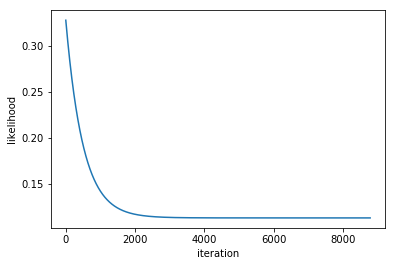

--------------------- final iteration


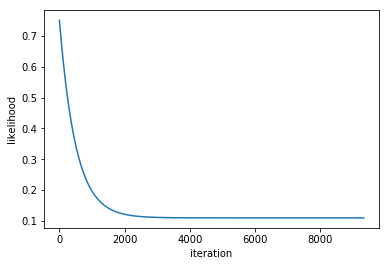

UnboundLocalError: local variable 'ws_tot' referenced before assignment

In [73]:
# step-wise
best_R2adj, idx_features = stepwise(model, R2_method, all_candidates, features, y, cv)

In [ ]:
# display selected features
results_r2_stepwise(best_R2adj[:len(best_R2adj)-1], idx_features)

# Least Squares Stochastic Gradient Descent

## Build features 

In [ ]:
# get feature names 
names = list(np.genfromtxt(my_path + r'/data/train.csv', delimiter=",", dtype=str, max_rows = 1)[2:])
log = False
degree = 1
X0, features_names = extend_features(X0, names, 1)

In [ ]:
all_candidates = X0

In [24]:
# parameters
model = dict()
model['method'] = 'lssgd'
model['loss'] = 'rmse'

# hyperparameters
model['batch_size'] = 50
model['max_iters'] = 10000
model['gamma'] = 1e-4
model['threshold'] = 1e-2

# other
model['debug_mode'] = 1

# R2 type
R2_method = 'McFadden' # 'loss', 'Tjur' or 'McFadden' 

# estimate R2 error through cross validation (1 or 0)
cv = 1
model['k_fold'] = 10

In [25]:
# step wise candidates
all_candidates = X0

# get feature names 
all_features = list(np.genfromtxt(my_path + r'/data/train.csv', delimiter=",", dtype=str, max_rows = 1)[2:])

# list of feature names and indices
features = []
for i in range(len(all_features)):
    features.append((i,all_features[i]))

In [26]:
# step-wise
best_R2adj, idx_features = stepwise(model, R2_method, all_candidates, features, y, cv)

KeyboardInterrupt: 

In [ ]:
# display selected features
results_r2_stepwise(best_R2adj[:len(best_R2adj)-1], idx_features)